# Cardiovascular disease dataset 

In [23]:
import pandas as pd 
import matplotlib.pyplot as plt

CVD = pd.read_csv('CVD.csv')

print(CVD.head())
CVD.describe()
CVD['DEATH_EVENT'].value_counts()


    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

0    203
1     96
Name: DEATH_EVENT, dtype: int64

## Visualizing the categorical variables 


## starting anaemia and death event (1st feature visualisation)

Text(0.5, 1.0, 'Anaemia')

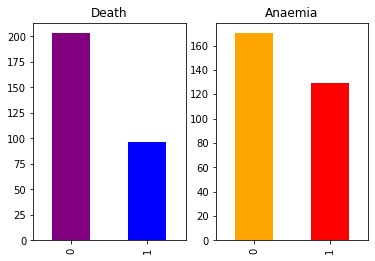

In [88]:

pd.DataFrame(CVD.DEATH_EVENT.value_counts(normalize = True)) #shows dataframe of survival vs death

Anaem = CVD.groupby('anaemia').DEATH_EVENT.value_counts(normalize=True)
Anaem #higher percentage of people who had anaemia died compared to people who did not have anaemia
Anaem = Anaem.unstack() #this cleans up the dataframe

plt.Figure(figsize=(10,4))

plt.subplot(1,2,1)
CVD.DEATH_EVENT.value_counts().plot(kind = 'bar', color = ['purple', 'blue'])
plt.title('Death')

plt.subplot(1,2,2)
CVD.anaemia.value_counts().plot(kind = 'bar', color = ['orange', 'red'])
plt.title('Anaemia')


### Pie charts 

Text(0.5, 1.0, 'Anaemia')

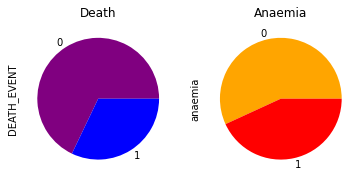

In [89]:
plt.Figure(figsize=(10,4))

plt.subplot(1,2,1)
CVD.DEATH_EVENT.value_counts().plot(kind = 'pie', colors = ['purple', 'blue'])
plt.title('Death')

plt.subplot(1,2,2)
CVD.anaemia.value_counts().plot(kind = 'pie', colors = ['orange', 'red'])
plt.title('Anaemia')

### Going back to the Anaemia dataframe I created earlier

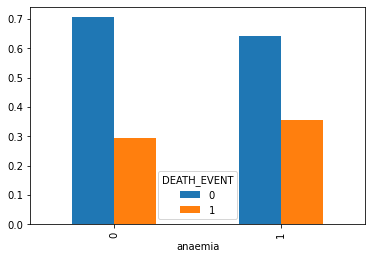

In [90]:
Anaem.plot(kind= 'bar') #shows a barplot with anaemia on x axis and death event on y axis. also shows the groups.

#note this basically says more people who had anaemia died from CVD supporting our claim



# Second feature visualization 

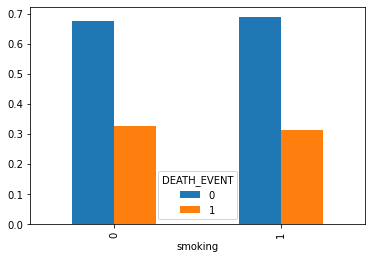

In [91]:
Smoker = CVD.groupby('smoking').DEATH_EVENT.value_counts(normalize=True)
Smoker = Smoker.unstack() #this cleans up the dataframe
Smoker

plt.Figure(figsize=(10,4))

Smoker.plot(kind = 'bar') #As can be seen, smoking or not smoking resulted in same proportion of deaths.


# 3rd visualisation

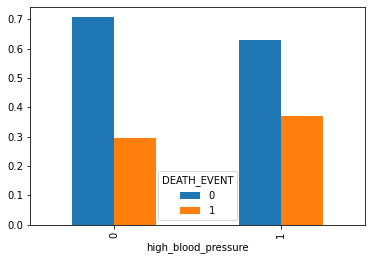

In [92]:
High_blood = CVD.groupby('high_blood_pressure').DEATH_EVENT.value_counts(normalize=True)
High_blood = High_blood.unstack() #this cleans up the dataframe
High_blood

plt.Figure(figsize=(10,4))

High_blood.plot(kind = 'bar') #As can be seen from the graph, higher proportion of people died when they also had high blood pressure


# 4th feature visualisation

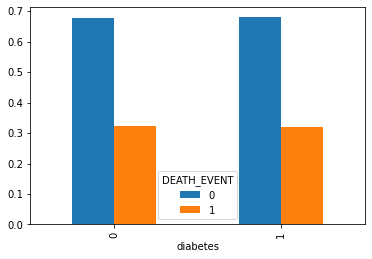

In [93]:
Diab = CVD.groupby('diabetes').DEATH_EVENT.value_counts(normalize=True)
Diab = Diab.unstack() #this cleans up the dataframe
Diab

plt.Figure(figsize=(10,4))

Diab.plot(kind = 'bar') #not much difference between the two groups. diabetes no effect on death from CVD?

# Building the logistic regression model 

In [100]:
#reducing dataset size to relevant features plus target 

from sklearn.linear_model import LogisticRegression
model = LogisticRegression() 

#The model has adequate information about the majority class but insufficient information about your minority class. 
#That is why there will be high misclassification errors for the minority class.

#Accuracy is a good measure if our classes are evenly split, but is very misleading if we have imbalanced classes.


CVD = CVD[['anaemia','diabetes','high_blood_pressure','smoking','DEATH_EVENT']]
CVD.isnull().sum() #no missing values 
CVD.dtypes #all integer

X = CVD[['anaemia', 'diabetes', 'high_blood_pressure', 'smoking']].values #.values converts to numpy array
y = CVD.iloc[:,4].values #retrieving target

print(X.shape)
print(X)
y.shape

#fitting the model 
model.fit(X,y)
print(model.coef_,model.intercept_)

print(X[0]) #predict first datapoint. this is first data point [0 0 1 0]]
model.predict([[0,0,1,0]]) #predicted first person did not die.

#Seeing how the model predicts for first 100 rows and compare to target array. Predictes all 0 

print(model.predict(X[:100]))
print(y[:100])


(299, 4)
[[0 0 1 0]
 [0 0 0 0]
 [0 0 0 1]
 ...
 [0 1 0 0]
 [0 0 0 1]
 [0 0 0 1]]
[[ 0.25764589 -0.00155536  0.32017237 -0.01020847]] [-0.97573867]
[0 0 1 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0
 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


# Previous predicted all 0 due to inbalance. Now to start exploring other metrics

In [104]:
#train/test split

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

print("whole dataset:", X.shape, y.shape)
print("training set:", X_train.shape, y_train.shape)
print("test set:", X_test.shape, y_test.shape)

#Building the model 

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


#note accuracy metric not reliable due to unbalance and precision score and recall score had issues due to no false positves or true negatives in the confusion matrix
print("Accuracy:", accuracy_score(y_test,y_pred))
print("precision:",precision_score(y_test, y_pred)) 
print("recall:",recall_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#issues with these metrics. there is no false positives or true negatives. keep getting 0 for recall score and precision score


whole dataset: (299, 4) (299,)
training set: (224, 4) (224,)
test set: (75, 4) (75,)
Accuracy: 0.7333333333333333
precision: 0.0
recall: 0.0
[[55  0]
 [20  0]]


C:\Users\Jamie\Documents\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Sensitivity and specificity 

In [105]:
#sensitivity = positive recall 

sensitivity_score = recall_score
print(sensitivity_score(y_test,y_pred)) #0 

#now for specificity 

from sklearn.metrics import precision_recall_fscore_support 
print(precision_recall_fscore_support(y_test, y_pred))

#the second array is the recall, first value is for negative class and second value of positive class
#second value is standard recall value

#writing a function to grab specificity value. note return r[o] goes for second array and first value
#p,r,f,s represent the 4 four variables because precision_recall_fscore_support function has 4 arrays. 

def specificity_score(y_true, y_pred):
    p,r,f,s = precision_recall_fscore_support(y_true,y_pred)
    return r[0]

print(specificity_score(y_test, y_pred)) 


0.0
(array([0.73333333, 0.        ]), array([1., 0.]), array([0.84615385, 0.        ]), array([55, 20], dtype=int64))
1.0


C:\Users\Jamie\Documents\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Adjusting the logistic regression threshold 

In [106]:
model.predict_proba(X_test)
print(model.predict_proba(X_test)[:,1]) #all values where individual died
#now we want to set a threshold to make sure we include all individuals who did in fact past away. 
#at the moment, if higher than 0.30 then classifier predicts death. 

y_pred = model.predict_proba(X_test)[:,1]>0.30 #if threshold too high then none are predicted as 1 and all predicted points are 0 (alive).

print("precision:", precision_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred))

#Note with threshold at 0.30, precision means we correctly predicted people who past away 30% of the time 
#all people who did die, we detected 80%. 
#so detected a lot but was quite inaccurate at predicting people who died. (a lot of false positives)
#our false negative would be reasonable low e.g. predicting people who didn't die but died.



[0.35048139 0.30385287 0.40111825 0.28935766 0.40111825 0.29721606
 0.34903884 0.28935766 0.34280544 0.35139763 0.30385287 0.29721606
 0.33572813 0.30385287 0.28935766 0.29721606 0.29589287 0.39204517
 0.3418998  0.35770222 0.40872585 0.35048139 0.28935766 0.40111825
 0.35139763 0.28935766 0.28935766 0.28935766 0.39204517 0.34423585
 0.29721606 0.30385287 0.34423585 0.35770222 0.35770222 0.39959551
 0.35139763 0.30385287 0.29589287 0.34423585 0.35770222 0.34903884
 0.40111825 0.29721606 0.29721606 0.35048139 0.30385287 0.35770222
 0.33572813 0.35770222 0.30385287 0.33572813 0.34280544 0.34280544
 0.34423585 0.28935766 0.35048139 0.28935766 0.39204517 0.34423585
 0.3418998  0.29721606 0.35770222 0.40111825 0.30385287 0.34903884
 0.29721606 0.35048139 0.30385287 0.29721606 0.30385287 0.29721606
 0.34280544 0.30385287 0.28935766]
precision: 0.3018867924528302
recall: 0.8


# ROC curve 

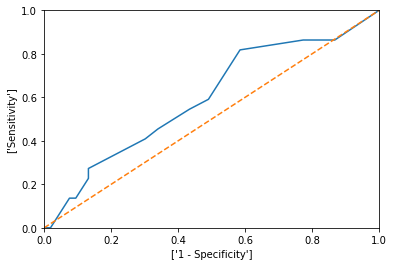

In [34]:
#some repeated code. roc curve shows different thresholds which represent different models 

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 5)

model.fit(X_train, y_train)

y_pred_prob = model.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1]) #y_pred_prob shows all people who died. also requires 1d argument

plt.plot(fpr,tpr) #fpr is x axis and tpr is y axis
plt.plot([0, 1], [0, 1], linestyle = '--') #random line comparing too.
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel(['1 - Specificity'])
plt.ylabel(['Sensitivity'])
plt.show()



# Area under the curve

In [35]:
#To get an empirical measure of this, we calculate the Area Under the Curve, also called the AUC. 
#This is the area under the ROC curve. It’s a value between 0 and 1, the higher the better.

from sklearn.metrics import roc_auc_score

CVD = CVD[['anaemia','diabetes','high_blood_pressure','smoking','DEATH_EVENT']]
CVD.isnull().sum() #no missing values 
CVD.dtypes #all integer

X = CVD[['anaemia', 'diabetes', 'high_blood_pressure', 'smoking']] 
y = CVD.iloc[:,4].values 

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 5)

#first model has diabetes, anaemica, high blood pressure and smoking features to predict death. 
y_pred_proba1 = model.predict_proba(X_test)
print("model 1 AUC score", roc_auc_score(y_test, y_pred_proba1[:,1]))

#trying alternative model, only considering high blood pressure and anaemia 

X_train2 = X_train[['anaemia', 'high_blood_pressure']]
X_test2 = X_test[['anaemia', 'high_blood_pressure']]

model2 = LogisticRegression()
model2.fit(X_train2, y_train)

y_pred_proba2 = model2.predict_proba(X_test2)
print("model 2 AUC score", roc_auc_score(y_test, y_pred_proba2[:,1]))




model 1 AUC score 0.5964837049742711
model 2 AUC score 0.6097770154373928


# K-fold cross validation

In [45]:
#for simplicity, going to take dataset with 6 datapoints and 2 features and a 3-fold cross validation 

from sklearn.model_selection import KFold

X = CVD[['anaemia', 'high_blood_pressure']].values[:6]
y = CVD['DEATH_EVENT'].values[:6]

#Instantiate a KFold class object 

kf = KFold(n_splits = 3, shuffle = True)

list(kf.split(X))

splits = list(kf.split(X))
first_split = splits[0] #first train test split
print(first_split)

#creating variables for train and test split for the two arrays in first split 

train_indices, test_indices = first_split
print("training set indices", train_indices)
print("test set indices", test_indices)

#now create x_train, y_train, x_test and y_test based on indices 

X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

#making sure correct amount of data points allocated to each group
print("X_train")
print(X_train)
print("y_train", y_train)
print("X_test")
print(X_test)
print("y_test", y_test)






(array([0, 2, 3, 5]), array([1, 4]))
training set indices [0 2 3 5]
test set indices [1 4]
X_train
[[0 1]
 [0 0]
 [1 0]
 [1 1]]
y_train [1 1 1 1]
X_test
[[0 0]
 [1 0]]
y_test [1 1]


# Building a model

In [46]:
X = CVD[['anaemia', 'high_blood_pressure', 'diabetes', 'smoking']].values 
y = CVD['DEATH_EVENT'].values

kf = KFold(n_splits = 5, shuffle = True)

splits = list(kf.split(X))
train_indices, test_indices = splits[0]

X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]

model = LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.7


## Looping over all the folds

In [107]:
import numpy as np
scores = []
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LogisticRegression()
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(scores)

print(np.mean(scores))


#to get best possible model we build on entire dataset but if asked for accuracy, use accuracy calculated by cross validation 

final_model= LogisticRegression()
final_model.fit(X,y)

[0.7, 0.7166666666666667, 0.6333333333333333, 0.6666666666666666, 0.6779661016949152]
0.6789265536723164


LogisticRegression()

## Going to compare multiple models 

In [114]:
#logistic regression using all features except for time
#logistic regression using  anaemia', 'high_blood_pressure', 'diabetes', 'smoking
#Logistic regression using anaemia and high_blood_pressure

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

kf = KFold(n_splits = 5, shuffle = True, random_state = 1)


CVD = pd.read_csv('CVD.csv')
CVD.isnull().sum()
CVD.head()

X1 = CVD.iloc[:,0:11].values

X2 = CVD[['anaemia', 'high_blood_pressure', 'diabetes', 'smoking']].values

X3= CVD[['anaemia', 'high_blood_pressure']].values

y= CVD['DEATH_EVENT'].values


#need to create a function to score X, y and kf 

def score_model(X,y,kf):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = LogisticRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
    print("accuracy", np.mean(accuracy_scores))
    print("precision_score", np.mean(precision_scores))
    print("recall_score", np.mean(recall_scores))
    print("f1_scores", np.mean(f1_scores))
    

print("logistic Regression with all features")
score_model(X1, y, kf)
print()
print("Logistic Regression with anaemia, high_blood_pressure, diabetes and smoking")
score_model(X2, y, kf)
print()
print("Logistic regression model with just anaemia and high_blood_pressure")
score_model(X3, y, kf)


logistic Regression with all features
accuracy 0.7393220338983052
precision_score 0.684978354978355
recall_score 0.3278782342976716
f1_scores 0.4278767507002801

Logistic Regression with anaemia, high_blood_pressure, diabetes and smoking
accuracy 0.6790395480225988
precision_score 0.0
recall_score 0.0
f1_scores 0.0

Logistic regression model with just anaemia and high_blood_pressure
accuracy 0.6790395480225988
precision_score 0.0
recall_score 0.0
f1_scores 0.0


C:\Users\Jamie\Documents\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jamie\Documents\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jamie\Documents\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to n